# Leaf Disease Detection

In [1]:
#!pip install numpy pandas tensorflow
# common libraries used for data manipulation and machine learning

In [2]:
import numpy as np
import pandas as pd
import tensorflow
import os

import matplotlib.pyplot as plt # a plotting library used for creating static, animated, and interactive visualizations

from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

#ImageDataGenerator: Generates batches of tensor image data with real-time data augmentation.
#img_to_array: Converts a PIL (Python Imaging Library) Image instance to a Numpy array.
#load_img: Loads an image into PIL format.
#VGG19: This is a pre-trained model that has been trained on the ImageNet dataset. It's a model that has proven to work well on image classification tasks.
#preprocess_input: Function for preprocessing the input to fit the requirements of the VGG19 model.
#decode_predictions: Function to decode the predictions made by the VGG19 model.

In [3]:
os.listdir('data/dataset/')

['.DS_Store', 'train', 'val']

In [4]:
train_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# defining image data generators for training and validation data, these generators will help with data augmentation, a technique used to increase the amount of training data by applying transformations like zooming, shearing, and flipping


In [5]:
train = train_datagen.flow_from_directory('data/dataset/train',
                                          target_size=(256,256),
                                          batch_size=32)

val = train_datagen.flow_from_directory('data/dataset/val',
                                          target_size=(256,256),
                                          batch_size=32)

# using the flow_from_directory function of the ImageDataGenerator to load images from the specified directories ('data/dataset/train' and 'data/dataset/val'). The function will generate batches of augmented/normalized data. The images will be resized to 256x256 pixels and your batch size is set to 32, meaning the model will take in 32 samples per gradient update for training

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [6]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))
ref

# creating a dictionary that maps the class indices to their respective class labels.

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [7]:
t_img,label = train.next()
t_img.shape

# get the next batch of images (t_img) and their corresponding labels (label). Then you're checking the shape of the image batch.

(32, 256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


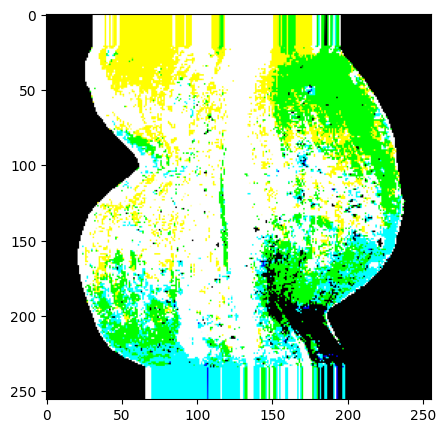

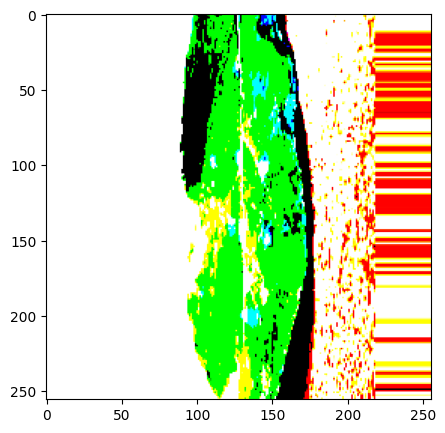

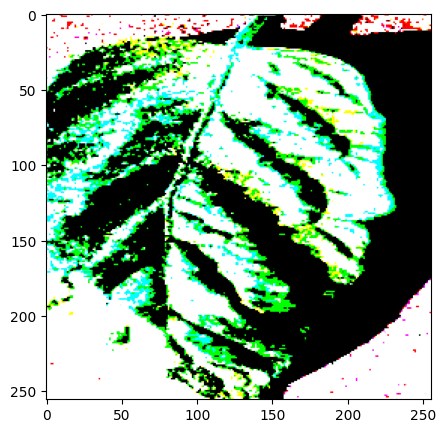

In [8]:
def plotimg(imgarr,label):
    for im,l in zip(imgarr,label):
        plt.figure(figsize=(5,5))
        plt.imshow(im)
    plt.show()

plotimg(t_img[:3],label[:3])

#defined a function plotimg that takes an array of images and their labels, and plots the first three images using matplotlib.pyplot, then call this function to visualize the first three images in your batch.

In [9]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

In [10]:
base_model = VGG19(input_shape=(256,256,3),include_top=False)
for layer in base_model.layers:
    layer.trainable = False

# initializing a VGG19 model with an input shape of 256x256x3 (width, height, color channels). include_top=False means not including the fully-connected layer at the top of the network. Then  loop through each layer in the base model and set trainable = False, freezing the weights in these layers so that they won't be updated during training.

In [11]:
base_model.summary()
# calling the summary method on base model, which will print a summary of model's architecture, showing the number of parameters, layers, and the output shape of each layer.

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [12]:
X = Flatten()(base_model.output)
# adding a Flatten layer to the base model. The Flatten layer reshapes the multi-dimensional tensor output from the previous layer into a one-dimensional tensor that can be used by the following fully connected layer.

X = Dense(units=38,activation='softmax')(X)
# adding a Dense layer with 38 units (one for each possible class of plant disease) and a softmax activation function. The softmax function will ensure that the output values of the layer are probabilities that sum up to 1, making it suitable for a multi-class classification problem.


In [13]:
model = Model(base_model.input,X)
model.summary()
# creating final model, specifying the input as the input of the base model and the output as the output of your new layer, then call model.summary() to print a summary of final model.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [14]:
model.compile(optimizer='adam',loss=tensorflow.keras.losses.categorical_crossentropy,metrics=['accuracy'])
# compiling model, specifying the optimizer, loss function, and metrics. The Adam optimizer is a popular choice as it adapts the learning rate during training. The categorical cross-entropy loss is suitable for multi-class classification problems. The accuracy metric will allow to monitor the accuracy of model during training.

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

es = EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)

mc = ModelCheckpoint(filepath='best_model.h5',
                    monitor = 'val_accuracy',
                    min_delta = 0.01,
                    patience = 3,
                    verbose = 1,
                    save_best_only = True)

cb = [es,mc]
# setting up callbacks to use during training. EarlyStopping will stop the training process if the validation accuracy does not improve by at least 0.01 for 3 consecutive epochs. ModelCheckpoint will save the model weights to a file whenever the validation accuracy improves. By setting save_best_only=True, ensure that the saved model will always be the best one seen so far in terms of validation accuracy.

In [16]:
cb = EarlyStopping(monitor='val_loss', patience=5)
# overwrite the previous cb variable. It sets up an EarlyStopping callback that monitors the validation loss and will stop the training if the validation loss does not improve for 5 consecutive epochs.

In [17]:
his = model.fit(train,
                steps_per_epoch=16,
                epochs=50,
                verbose=1,
                callbacks=cb,
                validation_data=val,
                validation_steps=16)
# train: This is the training data, which was defined earlier as an instance of ImageDataGenerator.
#steps_per_epoch=16: This is the number of batches of samples to go through per epoch. One "epoch" is one complete pass through the entire training dataset. Here, you're saying that you want to process 16 batches per epoch.
#epochs=50: This specifies the number of epochs to train the model. An epoch is an iteration over the entire dataset provided.
#verbose=1: This is a flag for logging the progress of the current epoch. 1 means that progress bar logging is enabled.
#callbacks=cb: These are functions that can be applied at certain stages of the training process. You've defined two callbacks: EarlyStopping and ModelCheckpoint.
#validation_data=val: This is the validation data that the model will check its performance against after each epoch.
#validation_steps=16: Just like steps_per_epoch, this is the number of batches to consider in the validation set per epoch.

Epoch 1/50
16/16 [==============================] - 80s 5s/step - loss: 27.5855 - accuracy: 0.1680 - val_loss: 21.5978 - val_accuracy: 0.3008
Epoch 2/50
16/16 [==============================] - 78s 5s/step - loss: 18.5292 - accuracy: 0.3613 - val_loss: 14.6255 - val_accuracy: 0.4629
Epoch 3/50
16/16 [==============================] - 79s 5s/step - loss: 13.1526 - accuracy: 0.4980 - val_loss: 10.8066 - val_accuracy: 0.5430
Epoch 4/50
16/16 [==============================] - 79s 5s/step - loss: 9.2733 - accuracy: 0.6191 - val_loss: 8.3833 - val_accuracy: 0.6523
Epoch 5/50
16/16 [==============================] - 79s 5s/step - loss: 9.8227 - accuracy: 0.6074 - val_loss: 9.7993 - val_accuracy: 0.5938
Epoch 6/50
16/16 [==============================] - 79s 5s/step - loss: 10.6394 - accuracy: 0.6035 - val_loss: 8.0334 - val_accuracy: 0.6797
Epoch 7/50
16/16 [==============================] - 79s 5s/step - loss: 9.9427 - accuracy: 0.6230 - val_loss: 6.7580 - val_accuracy: 0.6875
Epoch 8/50
16

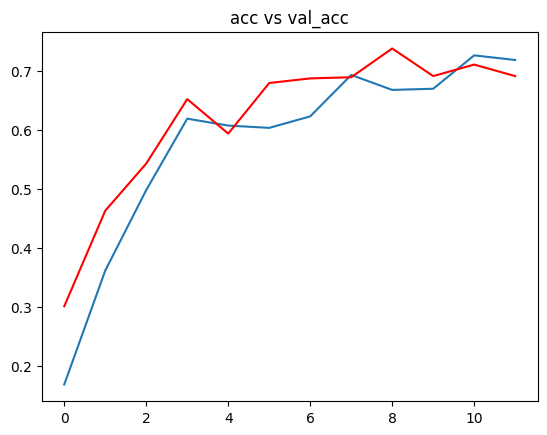

In [18]:
# plot the training and validation accuracy as the training progresses
h = his.history #creating a variable h that refers to the history dictionary of the History object his that was returned by model.fit. This dictionary has recorded the training loss values and metrics values at successive epochs, as well as validation loss and validation metrics values.

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
# creating a variable h that refers to the history dictionary of the History object his that was returned by model.fit. This dictionary has recorded the training loss values and metrics values at successive epochs, as well as validation loss and validation metrics values.

plt.title('acc vs val_acc')
plt.show()
# setting the title of the plot to 'acc vs val_acc' and then displaying the plot with plt.show(). The resulting plot will show how the training and validation accuracy changed over the course of training, which can be useful for diagnosing issues like overfitting (where the training accuracy continues to increase, but the validation accuracy starts to decrease).


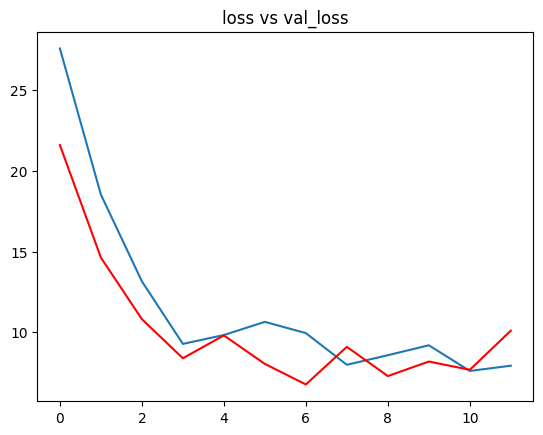

In [19]:
# plot the training and validation loss as the training progresses
plt.plot(h['loss']) # plotting the training loss at each epoch. This value is accessed from the history dictionary using the key 'loss'.
plt.plot(h['val_loss'],c='red') # plotting the validation loss at each epoch (in red). This value is accessed from the history dictionary using the key 'val_loss'.
plt.title('loss vs val_loss')
plt.show()
# setting the title of the plot to 'loss vs val_loss' and then displaying the plot with plt.show(). The resulting plot will show how the training and validation loss changed over the course of training, which can be useful for diagnosing issues like overfitting (where the training loss continues to decrease, but the validation loss starts to increase).

In [21]:
from tensorflow.keras.models import load_model

model = load_model(r'C:\Users\Admin\Desktop\Horticultural Disease Analysis\Main\Disease Analysis\best_model.h5')

In [22]:
# evaluating the performance of trained model on the validation data
acc = model.evaluate(val)[1]
# The evaluate method in Keras calculates the loss and any other metrics specified when the model was compiled, for the given dataset. By default, the method returns these as a list (e.g., [loss, accuracy]). Here, I only interested in the accuracy, so I take the second element of the list ([1]).

print(f'The accuracy of our model on val data is {acc*100}')
# print the accuracy percentage of your model on the validation data. The accuracy returned by the evaluate method is a fraction, so multiply it by 100 to convert it into a percentage.
# This final accuracy value gives an indication of how well model is expected to perform on new, unseen data.

550/550 [==============================] - 1346s 2s/step - loss: 8.0187 - accuracy: 0.6688
The accuracy of our model on val data is 66.87912344932556


In [23]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))
# creating a reference dictionary (ref) that maps the numerical class indices to their corresponding class names.

In [25]:
# takes an image file path as an input, processes the image, uses trained model to make a prediction, and then returns the predicted class name
def prediction(path):
    img = load_img(path,target_size=(256,256))
    img = img_to_array(img)
    img = preprocess_input(img)
    img = np.expand_dims(img,axis=0)
    pred = np.argmax(model.predict(img))
    return ref[pred]

In [26]:
# make predictions on a set of test images and print the results
for i in os.listdir('data/images_for_test'):
    pred = prediction(f'data/images_for_test/{i}')
    print(f'Actual --> {i}')
    print(f'Predicted --> {pred}')
    plt.show()

1/1 [==============================] - 0s 212ms/step
Actual --> AppleCedarRust1.JPG
Predicted --> Apple___Cedar_apple_rust
1/1 [==============================] - 0s 111ms/step
Actual --> AppleCedarRust2.JPG
Predicted --> Tomato___Septoria_leaf_spot
1/1 [==============================] - 0s 106ms/step
Actual --> AppleCedarRust3.JPG
Predicted --> Tomato___Septoria_leaf_spot
1/1 [==============================] - 0s 124ms/step
Actual --> AppleCedarRust4.JPG
Predicted --> Apple___Cedar_apple_rust
1/1 [==============================] - 0s 102ms/step
Actual --> AppleScab1.JPG
Predicted --> Tomato___Bacterial_spot
1/1 [==============================] - 0s 100ms/step
Actual --> AppleScab2.JPG
Predicted --> Apple___Apple_scab
1/1 [==============================] - 0s 103ms/step
Actual --> AppleScab3.JPG
Predicted --> Apple___Apple_scab
1/1 [==============================] - 0s 100ms/step
Actual --> CornCommonRust1.JPG
Predicted --> Corn_(maize)___Common_rust_
1/1 [==============================